In [72]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fqtoolkit import dgToDf as dtd
import statsmodels.api as sm

In [73]:
from sklearn.tree import DecisionTreeRegressor

In [74]:
%config InlineBackend.figure_format = "retina"

In [75]:
assets, liability, sale, income, price = [item[1] for item in dtd("data2.xlsx", "Sheet1", 5).items()]

In [76]:
assets0 = assets.pct_change()
liability0 = liability.pct_change()

In [77]:
# asset, liability value는 12개월간 변하지 않으므로, 
# 가장 최근 주어진 변화율로 0을 채움.
assets0 = assets0.where(assets0 != 0, np.nan)
assets0 = assets0.fillna(method="ffill")

liability0 = liability0.where(liability0 != 0, np.nan)
liability0 = liability0.fillna(method="ffill")

In [78]:
#shift를 통해 정보를 실제로 얻는 시점까지 미룸

assets0 = assets0.shift(12+6)
liability0 = liability0.shift(12+6)
sale = sale.shift(12+6)
income = income.shift(12+6)

In [79]:
assets0

,삼성전자,LG에너지솔루션,SK하이닉스,삼성바이오로직스,NAVER,삼성SDI,현대차,카카오,LG화학,기아,...,네이처셀,주성엔지니어링,SFA반도체,덕산네오룩스,메가스터디교육,NICE평가정보,피엔티,케어젠,와이지엔터테인먼트,에이비엘바이오
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31,0.072813,NaN,0.090815,0.086706,0.383325,0.084733,0.076252,0.368161,0.216447,0.092974,...,-0.07905,0.234474,-0.112947,0.21842,0.280042,0.155824,-0.12972,-0.065953,0.051265,-0.300962
2022-02-28,0.072813,NaN,0.090815,0.086706,0.383325,0.084733,0.076252,0.368161,0.216447,0.092974,...,-0.07905,0.234474,-0.112947,0.21842,0.280042,0.155824,-0.12972,-0.065953,0.051265,-0.300962
2022-03-31,0.072813,NaN,0.090815,0.086706,0.383325,0.084733,0.076252,0.368161,0.216447,0.092974,...,-0.07905,0.234474,-0.112947,0.21842,0.280042,0.155824,-0.12972,-0.065953,0.051265,-0.300962


In [81]:
price.head()

,삼성전자,LG에너지솔루션,SK하이닉스,삼성바이오로직스,NAVER,삼성SDI,현대차,카카오,LG화학,기아,...,네이처셀,주성엔지니어링,SFA반도체,덕산네오룩스,메가스터디교육,NICE평가정보,피엔티,케어젠,와이지엔터테인먼트,에이비엘바이오
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2000-01-31,3910,NaN,462551,NaN,NaN,33804,10835,20556,NaN,4742,...,4572,36388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,3588,NaN,313624,NaN,NaN,24992,7635,31130,NaN,3155,...,6949,46388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,4695,NaN,431013,NaN,NaN,31145,8491,17342,NaN,3529,...,11704,35048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-30,4204,NaN,308367,NaN,NaN,35171,6622,8882,NaN,3557,...,10789,31986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-31,4316,NaN,308367,NaN,NaN,32664,7667,13636,NaN,4361,...,6931,22914,NaN,NaN,NaN,1075,NaN,NaN,NaN,NaN


In [123]:
sale.tail()

,삼성전자,LG에너지솔루션,SK하이닉스,삼성바이오로직스,NAVER,삼성SDI,현대차,카카오,LG화학,기아,...,네이처셀,주성엔지니어링,SFA반도체,덕산네오룩스,메가스터디교육,NICE평가정보,피엔티,케어젠,와이지엔터테인먼트,에이비엘바이오
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2022-01-31,236806988000,1461068000,31900418000,1164776873.64,5304145900.39,11294770446.040001,103997601000,4156816120.72,30058872000,59168096000,...,16719797.4,118545864.75,573077540.34,144162647.18,474716713.89,446005796.02,390049983.36,60295113.42,255262402.3,8104203.46
2022-02-28,236806988000,1461068000,31900418000,1164776873.64,5304145900.39,11294770446.040001,103997601000,4156816120.72,30058872000,59168096000,...,16719797.4,118545864.75,573077540.34,144162647.18,474716713.89,446005796.02,390049983.36,60295113.42,255262402.3,8104203.46
2022-03-31,236806988000,1461068000,31900418000,1164776873.64,5304145900.39,11294770446.040001,103997601000,4156816120.72,30058872000,59168096000,...,16719797.4,118545864.75,573077540.34,144162647.18,474716713.89,446005796.02,390049983.36,60295113.42,255262402.3,8104203.46
2022-04-30,236806988000,1461068000,31900418000,1164776873.64,5304145900.39,11294770446.040001,103997601000,4156816120.72,30058872000,59168096000,...,16719797.4,118545864.75,573077540.34,144162647.18,474716713.89,446005796.02,390049983.36,60295113.42,255262402.3,8104203.46
2022-05-16,236806988000,1461068000,31900418000,1164776873.64,5304145900.39,11294770446.040001,103997601000,4156816120.72,30058872000,59168096000,...,16719797.4,118545864.75,573077540.34,144162647.18,474716713.89,446005796.02,390049983.36,60295113.42,255262402.3,8104203.46


In [82]:
returns = price.pct_change()

In [83]:
#price = price.dropna(axis=1)
returns = price.shift(0).pct_change()
returns0 = price.shift(0).pct_change()
returns.head(20)

,삼성전자,LG에너지솔루션,SK하이닉스,삼성바이오로직스,NAVER,삼성SDI,현대차,카카오,LG화학,기아,...,네이처셀,주성엔지니어링,SFA반도체,덕산네오룩스,메가스터디교육,NICE평가정보,피엔티,케어젠,와이지엔터테인먼트,에이비엘바이오
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2000-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,-0.082353,NaN,-0.321969,NaN,NaN,-0.260679,-0.295339,0.514400,NaN,-0.334669,...,0.519904,0.274816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,0.308528,NaN,0.374299,NaN,NaN,0.246199,0.112115,-0.442917,NaN,0.118542,...,0.684271,-0.244460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-30,-0.104579,NaN,-0.284553,NaN,NaN,0.129266,-0.220115,-0.487833,NaN,0.007934,...,-0.078178,-0.087366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-31,0.026641,NaN,0.000000,NaN,NaN,-0.071280,0.157807,0.535240,NaN,0.226033,...,-0.357586,-0.283624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-06-30,0.199722,NaN,0.250001,NaN,NaN,0.255939,0.181818,0.315195,NaN,0.035772,...,0.266484,0.054159,NaN,NaN,NaN,-0.246512,NaN,NaN,NaN,NaN
2000-07-31,-0.200463,NaN,-0.209091,NaN,NaN,-0.078515,0.045470,-0.326419,NaN,0.124862,...,-0.406243,-0.457172,NaN,NaN,NaN,0.272840,NaN,NaN,NaN,NaN
2000-08-31,-0.072947,NaN,0.166668,NaN,NaN,0.004074,0.123720,-0.030795,NaN,-0.062389,...,0.449156,-0.094646,NaN,NaN,NaN,-0.270611,NaN,NaN,NaN,NaN
2000-09-30,-0.261334,NaN,-0.214286,NaN,NaN,-0.109097,-0.136872,-0.158951,NaN,-0.096348,...,-0.268767,-0.417404,NaN,NaN,NaN,-0.174202,NaN,NaN,NaN,NaN


## 최적 Max Depth 찾는 과정

이 과정은 기대수익률 추정에 사용되는 DT에서 max depth를 조절하며 validation에서 가장 좋은 성능을 발휘하는 max depth를 찾는 과정입니다.
구간을 움직여 가며(rolling) 학습 데이터를 업데이트하여 가장 최근의 학습 데이터의 바로 다음 달의 기대수익률을 추정하는 방식입니다.
각각의 학습에서 Data Leakage가 없으므로, 이렇게 계산된 기대수익과 실제 수익 간의 차이를 통해 만든 펀더멘털 괴리도를 가지고 다시 모형을 만들 수 있습니다.

여기서는 단순히 과거 펀더멘털 괴리도의 평균과 표준편차를 이용해 표준화한 펀더멘털 괴리도를 트레이딩 시그널로 사용하였습니다.
검증 metric은 $R^2$로 하였습니다.

In [125]:
from sklearn.metrics import classification_report

results = {}
r2 = []
Max_Depth = 0
Depth = 0

for maxD in range(1,20):
    for col in returns.columns:
        reSeries = {}
        for n in range(1, returns.shape[0]-152):
            #n부터 n+1**까지의 롤링 데이터 준비
            temp = pd.DataFrame({"asset":assets0[col].iloc[n:n+151], #n시점의 총자산 변화율
                                "liability":liability0[col].iloc[n:n+151], #n시점의 총부채 변화율
                                "sale":sale[col].iloc[n:n+151], #n시점의 매출액
                                "income":income[col].iloc[n:n+151], #n시점의 영업이익
                                 "re0": returns[col].iloc[n-1:n+150], #n-1시점의 종목 수익률
                                "re": returns[col].iloc[n:n+151]}) #n시점의 종목 수익률

            temp = temp.dropna() # 데이터 결측치 제거
            
            if temp.shape[0] < 50: #만약 결측치를 제거하였을 때도 길이가 50보다 작을 경우, signal 생성을 하지 않음
                continue

            model = DecisionTreeRegressor(max_depth=maxD, random_state=10)
            model.fit(temp.drop("re", axis=1).iloc[:-1,:], temp["re"].iloc[:-1]) #현재 수익률 추정 모형 fitting
            r = model.predict(temp.drop("re", axis=1).iloc[[-1], :]) #현재 시점의 추정 수익률 계산
            reSeries[temp.index[-1]] = temp["re"].iloc[-1]-r[0] #현재 시점의 추정오차 저장

            if len(reSeries) > 0: #추정오차 데이터가 있는 경우만 signal 저장
                results[col] = pd.Series(reSeries) 


    results = pd.DataFrame(results) #시그널 데이터프레임화
    signal = (results).mean(axis=1) #종목별 시그널 통합

    temp = pd.DataFrame({"returns":returns.shift(-1).mean(axis=1), "result":signal}).dropna() #성능 측정용 데이터 준비
    test = temp.iloc[int(temp.shape[0]/4):2*int(temp.shape[0]/4), :] #validation set
    test0 = temp.iloc[2*int(temp.shape[0]/4):, :] #test set

    mu = temp.result.iloc[:int(temp.shape[0]/4)].mean() #training set에서의 signal 평균
    sd = temp.result.iloc[:int(temp.shape[0]/4)].std() #training set에서의 signal 표준편차

    test.result = (test.result-mu)/sd #training set 평균 표준편차를 이용한 정규화
    test0.result = (test0.result-mu)/sd #training set 평균 표준편차를 이용한 정규화
    
    r2_Depth = np.corrcoef(test.returns, -test.result)[1,0 ] ** 2 * 100
    
    if r2_Depth > Max_Depth:
        Max_Depth = r2_Depth
        Depth = maxD

    # signal과 미래 수익률 간의 R Squared 측정
    
    r2.append(np.corrcoef(test.returns, -test.result)[1,0 ] ** 2 )
    print(f"{np.corrcoef(test.returns, -test.result)[1,0 ] ** 2 * 100:.4f}%")
print(Depth, Max_Depth)

0.8662%
0.0736%
5.8728%
31.5541%
20.1392%


KeyboardInterrupt: 

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(10, 5))
plt.xlabel("Max Depths")
plt.ylabel("$R^2$")
plt.plot(list(range(1, 20)), r2)
plt.show()

### 위의 그래프에서 가장 높은 R squared 값을 가지거나 다른 합리적인 이유로 선택하면 될 듯한 max depth 값을 선정

아래의 코드는 max depth를 바꾸는 루프만 없을 뿐, 나머지는 동일.

In [114]:
maxD =4
results = {}

for col in returns.columns:
    reSeries = {}
    for n in range(1, returns.shape[0]-152):

            #n부터 n+120까지의 롤링 데이터 준비
        temp = pd.DataFrame({"asset":assets0[col].iloc[n:n+151],
                                "liability":liability0[col].iloc[n:n+151],
                                "sale":sale[col].iloc[n:n+151],
                                "income":income[col].iloc[n:n+151],
                                 "re0": returns[col].iloc[n-1:n+150],
                                "re": returns[col].iloc[n:n+151]})
        temp = temp.dropna()

        if temp.shape[0] < 50:
            continue

        model = DecisionTreeRegressor(max_depth=maxD, random_state=10)#
        model.fit(temp.drop("re", axis=1).iloc[:-1,:], temp["re"].iloc[:-1])
        r = model.predict(temp.drop("re", axis=1).iloc[[-1], :])
        reSeries[temp.index[-1]] = temp["re"].iloc[-1]-r[0]

        if len(reSeries) > 0:
            results[col] = pd.Series(reSeries)

In [115]:
temp

,asset,liability,sale,income,re0,re
Unnamed: 0,,,,,,
2019-01-31,1.705019,4.416607,71428.57,-9649762.22,-0.155000,-0.155000
2019-02-28,1.705019,4.416607,71428.57,-9649762.22,0.150888,0.150888
2019-03-31,1.705019,4.416607,71428.57,-9649762.22,0.550129,0.550129
2019-04-30,1.705019,4.416607,71428.57,-9649762.22,0.121061,0.121061
2019-05-31,1.705019,4.416607,71428.57,-9649762.22,-0.039941,-0.039941
2019-06-30,1.705019,4.416607,71428.57,-9649762.22,-0.254237,-0.254237
2019-07-31,7.290237,-0.888014,1257883.68,-24027290.45,-0.154959,-0.154959
2019-08-31,7.290237,-0.888014,1257883.68,-24027290.45,-0.097800,-0.097800
2019-09-30,7.290237,-0.888014,1257883.68,-24027290.45,-0.084011,-0.084011


In [112]:
temp = pd.DataFrame({"asset":assets0[col].iloc[n:n+151],
                        "liability":liability0[col].iloc[n:n+151],
                        "sale":sale[col].iloc[n:n+151],
                        "income":income[col].iloc[n:n+151],
                         "re0": returns[col].iloc[n-1:n+150],
                        "re": returns[col].iloc[n:n+151]})
temp

,asset,liability,sale,income,re0,re
Unnamed: 0,,,,,,
2009-08-31,NaN,NaN,NaN,NaN,NaN,NaN
2009-09-30,NaN,NaN,NaN,NaN,NaN,NaN
2009-10-31,NaN,NaN,NaN,NaN,NaN,NaN
2009-11-30,NaN,NaN,NaN,NaN,NaN,NaN
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-11-30,-0.300962,-0.152804,8104203.46,-59647069,-0.107728,-0.107728
2021-12-31,-0.300962,-0.152804,8104203.46,-59647069,0.160105,0.160105
2022-01-31,-0.300962,-0.152804,8104203.46,-59647069,0.269231,0.269231


### 통계검정을 위한 데이터셋 분할과 전략 구상

vailidation에서 레이블 0(하락)에 대한 예측은 잘 들이맞지 않았으므로, 상승할 경우만 예측하고 하락할 것으로 예측할 경우는 매매를 하지 않는 전략을 사용. 투자 가중치로는 표준화된 펀더멘털 괴리도를 그대로 사용.

In [85]:
results = pd.DataFrame(results)

signal = (results).mean(axis=1)

temp = pd.DataFrame({"returns":returns.shift(-1).mean(axis=1), "result":signal}).dropna() #전략 생성을 위한 시그널과 수익률 날짜맞춤
test = temp.iloc[int(temp.shape[0]/4):2*int(temp.shape[0]/4), :] #validation set 생성
test0 = temp.iloc[2*int(temp.shape[0]/4):, :] #test set생성

#training set에서 평균과 표준편차 추출
mu = temp.result.iloc[:int(temp.shape[0]/4)].mean() 
sd = temp.result.iloc[:int(temp.shape[0]/4)].std()

#표준화
test.result = (test.result-mu)/sd
#표준화
test0.result = (test0.result-mu)/sd
# 시그널을 이용한 전략 수익률을 생성
test["port"] = test["returns"]* np.where( test.result< 0, -test.result, 0)
test0["port"] = test0["returns"] * np.where( test0.result< 0, -test0.result, 0) 

print(f"{np.corrcoef(test.returns, -test.result)[1,0 ] ** 2 * 100:.4f}%")
print(classification_report(np.where(test.returns> 0, 1, 0), np.where(-test.result >0, 1, 0)))

31.5541%
              precision    recall  f1-score   support

           0       0.54      0.88      0.67         8
           1       0.94      0.71      0.81        21

    accuracy                           0.76        29
   macro avg       0.74      0.79      0.74        29
weighted avg       0.83      0.76      0.77        29



In [86]:
tVals = []
ports = {} #각 종목에서의 전략 수행 결과 기록용 딕셔너리

for col in results.columns:
    
    #종목별로 위의 과정을 거침
    
    temp = pd.DataFrame({"returns":returns.shift(-1)[col], "result":results[col]}).dropna()
    test = temp.iloc[int(temp.shape[0]/4):2*int(temp.shape[0]/4), :]
    test0 = temp.iloc[2*int(temp.shape[0]/4):, :]

    mu = temp.result.iloc[:int(temp.shape[0]/4)].mean()
    sd = temp.result.iloc[:int(temp.shape[0]/4)].std()

    test.result = (test.result-mu)/sd
    test0.result = (test0.result-mu)/sd

    test["port"] = test["returns"]* np.where( test.result< 0, -test.result, 0)#
    test0["port"] = test0["returns"] * np.where( test0.result< 0, -test0.result, 0)
    
    ports[col] = test0["port"] #종목별 전략 성과 저장

In [87]:
ports = pd.DataFrame(ports)
ports.head()

,삼성전자,SK하이닉스,삼성바이오로직스,NAVER,삼성SDI,현대차,카카오,LG화학,기아,POSCO홀딩스,...,안랩,네이처셀,주성엔지니어링,SFA반도체,덕산네오룩스,메가스터디교육,NICE평가정보,피엔티,케어젠,와이지엔터테인먼트
2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-31,0.000000,0.000000,NaN,-0.009106,0.000000,-0.014558,0.000000,-0.037660,-0.000000,0.000000,...,-0.059333,0.0,0.000000,0.000000,NaN,NaN,-0.006435,NaN,NaN,NaN
2017-06-30,0.001232,-0.000000,NaN,-0.049605,-0.018235,-0.000000,0.000000,0.000000,-0.042778,0.000000,...,0.030651,0.0,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN
2017-07-31,-0.074570,0.000000,NaN,-0.089918,0.067247,-0.000000,0.029069,0.256015,-0.015373,0.041242,...,-0.000000,0.0,0.000000,-0.216664,NaN,NaN,-0.000000,NaN,NaN,NaN
2017-08-31,0.000133,0.093178,NaN,-0.009595,0.019976,0.013965,0.000000,0.036032,-0.000000,-0.007592,...,-0.000000,-0.0,-0.086918,-0.002989,NaN,NaN,0.027371,NaN,NaN,NaN


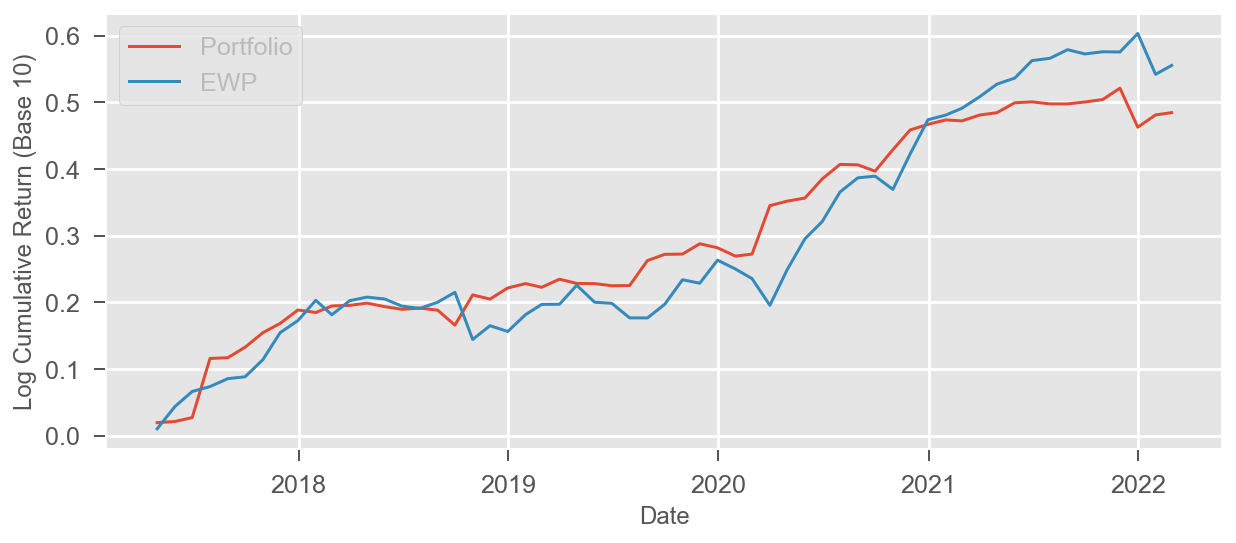

In [88]:
plt.figure(figsize=(10, 4))
plt.xlabel("Date")
plt.ylabel("Log Cumulative Return (Base 10)")
plt.plot(np.log10((1+ports.mean(axis=1)).cumprod()), label="Portfolio")
plt.plot(np.log10((1+returns.loc[ports.index, :].mean(axis=1)).cumprod()), label="EWP")
plt.legend();

In [103]:
P = ports.mean(axis=1)
EWP = returns.loc[ports.index, :].mean(axis=1)

P = P[:'2019']
EWP = EWP[:'2019']

result = {"Portfolio":[P.mean(), P.std(), P.mean()/P.std(), np.percentile(P, 5)], 
          "EWP":[EWP.mean(), EWP.std(), EWP.mean()/EWP.std(), np.percentile(EWP, 5)]}

result = pd.DataFrame(result).T

result.columns = ["Mean", "SD", "Sharpe Ratio", "5 Percentile"]
result.iloc[:, [0,1 ,3]] = (np.round(result.iloc[:, [0,1 ,3]]*100, 2)).astype(str) + "%"

result["Sharpe Ratio"] = np.round(result["Sharpe Ratio"], 2)

result

,Mean,SD,Sharpe Ratio,5 Percentile
Portfolio,2.09%,4.86%,0.43,-1.44%
EWP,1.98%,5.1%,0.39,-5.21%


In [104]:
np.mean(P -EWP)

0.001074462164223179

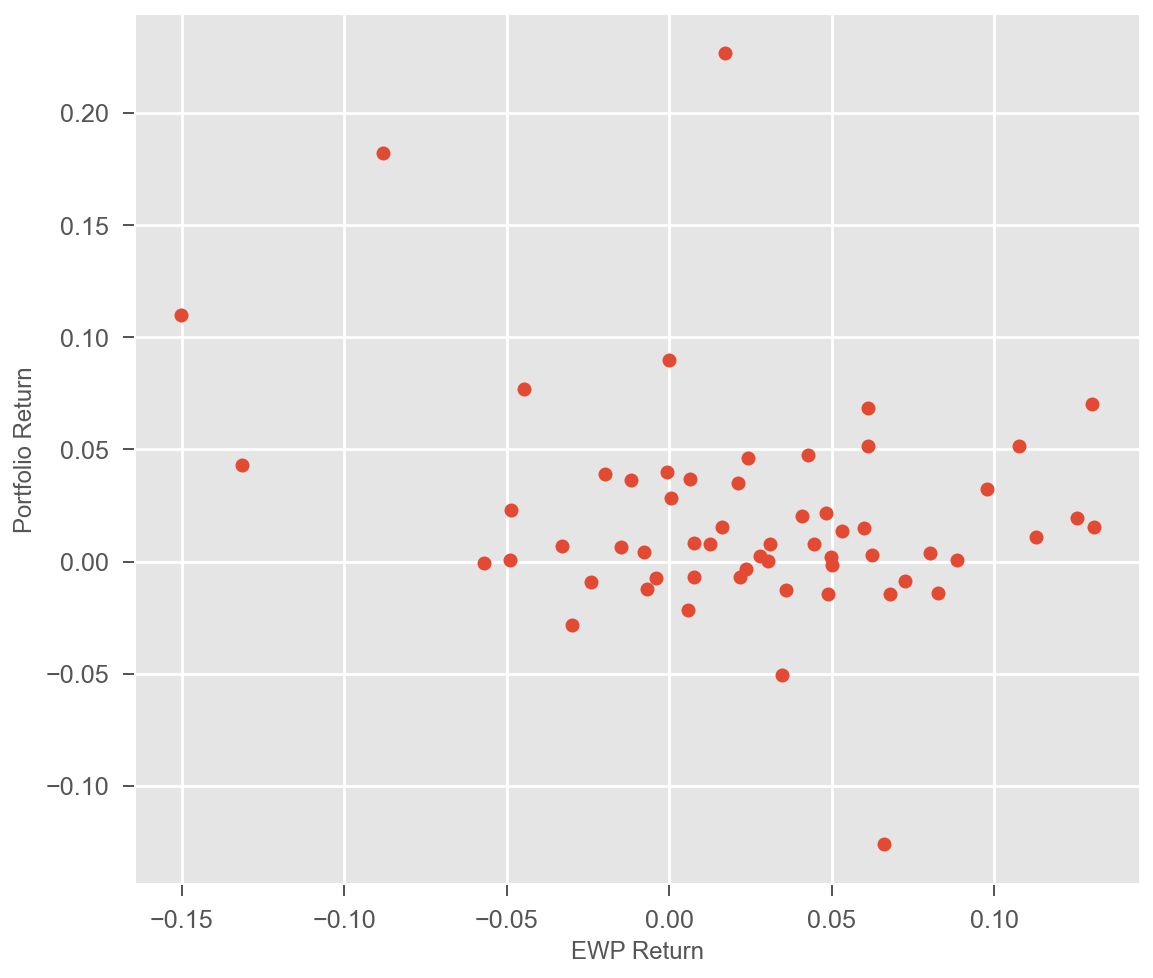

In [105]:
plt.figure(figsize=(9, 8))
plt.xlabel("EWP Return")
plt.ylabel("Portfolio Return")
plt.plot(returns.loc[ports.index, :].mean(axis=1), ports.mean(axis=1), "o");

In [106]:
#전략 유의성 검증 분석용 변수들 설정
test = pd.DataFrame({"port":ports.mean(axis=1), "market":returns.loc[ports.index, :].mean(axis=1)}).dropna() 
test["market+"] = np.where(test["market"] > 0,test["market"] , 0 ) #가상 옵션 수익률 생성.
test.head()

,port,market,market+
2017-04-30,0.046258,0.024179,0.024179
2017-05-31,0.004036,0.080085,0.080085
2017-06-30,0.013460,0.053266,0.053266
2017-07-31,0.226540,0.017088,0.017088
2017-08-31,0.002646,0.027830,0.027830


### CAPM 기반 통계검정

In [107]:
sm.OLS(test["port"], sm.add_constant(test[["market"]])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   port   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     3.971
Date:                Sun, 05 Jun 2022   Prob (F-statistic):             0.0511
Time:                        20:48:11   Log-Likelihood:                 96.405
No. Observations:                  59   AIC:                            -188.8
Df Residuals:                      57   BIC:                            -184.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0254      0.007      3.749      0.000       0.012       0.039
market        -0.2206      0.111     -1.993      0.051      -0.442       0.001
==============================================================================
Omnibus:                       31.649   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.544
Skew:                           1.426   Prob(JB):                     1.99e-23
Kurtosis:                       8.864   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

상수항이 0.05의 유의수준에서 통계적으로 유의하게 0보다 큼. 즉, 시장의 움직임과 다른 초과수익이 발생.

### HM 시점선택 모형 기반 시점선택 능력 평가

EWP가 하락할 때 베타를 줄이고, EWP가 상승할 때 베타를 늘리는지를 확인

In [108]:
sm.OLS(test["port"], sm.add_constant(test[["market", "market+"]])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   port   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     3.521
Date:                Sun, 05 Jun 2022   Prob (F-statistic):             0.0363
Time:                        20:48:12   Log-Likelihood:                 97.913
No. Observations:                  59   AIC:                            -189.8
Df Residuals:                      56   BIC:                            -183.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0128      0.010      1.288      0.203      -0.007       0.033
market        -0.5569      0.224     -2.482      0.016      -1.006      -0.107
market+        0.5741      0.335      1.714      0.092      -0.097       1.245
==============================================================================
Omnibus:                       36.397   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.008
Skew:                           1.540   Prob(JB):                     1.09e-35
Kurtosis:                      10.484   Cond. No.                         63.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

market+ 변수의 회귀계수가 통계적으로 유의: 유의미한 시점선택이 이루어지고 있음을 의미

## 번외편: 비모수 시점선택 통계검정

주가 급상승기에 모수 검정법이 통하지 않을 경우를 대비해 생성.

In [126]:
from itertools import combinations as c

def estimation(bench, port):
    
    n0 = 0
    
    n = 0
    
    for t1, t2, t3 in c(range(len(bench)), 3):
        
        n0 += 1
        
        rms = bench.iloc[[t1, t2, t3]].sort_values()
        
        trueT1, trueT2, trueT3 = rms.index
        
        betaH = (port.loc[trueT3] - port.loc[trueT2]) / (bench.loc[trueT3] - bench.loc[trueT2])
        
        betaL = (port.loc[trueT2] - port.loc[trueT1]) / (bench.loc[trueT2] - bench.loc[trueT1])
        
        if betaH > betaL:
            
            n += 1
            
            
    return 2*(n / n0) -1
        
    
def kernel(rms, ris):
    
    rm1, rm2, rm3 = rms
    ri1, ri2, ri3 = ris
    
    premise = rm1 < rm2 and rm2 < rm3
    
    if not premise:
        
        return 0
    
    betaH = (ri3 - ri2) / (rm3 - rm2)
        
    betaL = (ri2 - ri1) / (rm2 - rm1)
    
    conclusion = betaH > betaL
    
    
    if  premise and not conclusion:
        
        return 0
    
    else:
        
        return 1
    
    
    
def stanardE(bench, port, esti):
    
    sum0 = 0
    
    for t1 in bench.index:
        
        sum1 = 0
        
        n0 = 0
        
        for t2, t3 in c(bench.index, 2):
            
            n0 += 1
            
            sum1 += kernel(bench.loc[[t1, t2, t3]], port.loc[[t1, t2, t3]])
            
            
        sum1 = (sum1 / n0 - esti) ** 2
        
        sum0 += sum1
        
        
    
    var = 9 / len(bench.index) * sum0
    
    return np.sqrt(var)
    
from scipy.stats import norm

def nonParaMT(bench, port):
    
    esti = estimation(bench, port)
    se = stanardE(bench, port, esti)
    
    statistic = esti * np.sqrt(len(bench)) /se
    
    pVal = 1 - norm.cdf(statistic, loc=0, scale=1)
    
    return esti, se , statistic, pVal

In [128]:
nonParaMT(test["market"], test["port"])

(0.07473424941664497,
 0.2788862698043551,
 2.0408286402679052,
 0.020633931371964342)

비모수 방법으로도 통계적으로 유의한 결과가 도출